# 1.Read Data

## How to Run
1. Place 'diabetes_diagnosis.csv' in the same folder as this notebook.
2. Install required packages if not already available:
   pip install pandas numpy matplotlib seaborn
3. After running all cells, the cleaned dataset will be saved automatically      as'diabetes_cleaned.csv' in the same folder as this notebook.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)

# read data
# Note:
# Please place the dataset file (e.g., diabetes_diagnosis.csv) in the same folder as this notebook before running.
df = pd.read_csv("diabetes_diagnosis.csv")

# check data size & show rows to see the structure
print("Shape:", df.shape)
display(df.head())

#check basic info (columns, non-null counts, dtypes, memory)
print("\n basic info ")
print(df.info())

# check missing value rate
print("\n rate of misssing value(%) ")
print((df.isnull().mean() * 100).round(2))

# check number of unique values
print("\n unique ")
print(df.nunique())

# check basic statistics of numerical features
print("\n describe ")
print(df.describe().T)



Shape: (264802, 23)


,Unnamed: 0,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GeneralHealth,Mental (days),Physical (days),DiffWalk,Sex,Age,Education,Income,Diabetes,BloodPressure,Cholesterol,Alcoholic
0,0,NaN,40.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,15.0,NaN,NaN,63.0,High school graduate,"$73,106",No,Yes,Yes,No
1,1,NaN,25.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,Good,NaN,NaN,NaN,Female,54.0,College graduate,"$22,322",No,No,No,No
2,2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,Poor,30.0,NaN,1.0,NaN,NaN,High school graduate,"$29,097",No,Yes,Yes,NaN
3,3,1.0,27.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,74.0,Some high school,"$55,498",No,Yes,No,No
4,4,NaN,24.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Very Good,NaN,0.0,0.0,Female,NaN,Some college,"$15,629",No,Yes,NaN,No



 basic info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264802 entries, 0 to 264801
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            264802 non-null  int64  
 1   CholCheck             113865 non-null  float64
 2   BMI                   177418 non-null  float64
 3   Smoker                145642 non-null  float64
 4   Stroke                105921 non-null  float64
 5   HeartDiseaseorAttack  193306 non-null  float64
 6   PhysActivity          76793 non-null   float64
 7   Fruits                103273 non-null  float64
 8   Veggies               95329 non-null   float64
 9   AnyHealthcare         82089 non-null   float64
 10  NoDocbcCost           66201 non-null   float64
 11  GeneralHealth         195954 non-null  object 
 12  Mental (days)         135050 non-null  float64
 13  Physical (days)       121809 non-null  float64
 14  DiffWalk              121809 non-null 

# 2.Clean Data

## 1. Delete Unnamed Column and Redundant Features

In [2]:
df = df.copy()

# Delete the useless column

df.drop(columns=["Unnamed: 0", "CholCheck"], inplace=True, errors="ignore")

df.columns

Index(['BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
       'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'GeneralHealth',
       'Mental (days)', 'Physical (days)', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Diabetes', 'BloodPressure', 'Cholesterol',
       'Alcoholic'],
      dtype='object')

## 2.Inconsistent Data Type

In [3]:
# Yes/No -> 0/1
'''
For the three columns of BloodPressure, Cholesterol, and Alcoholic:

First, convert the value to a string, remove the Spaces, and write it in smaller size.

Map "yes" to 1 and "no" to 0.

Convert to numeric types (values that cannot be converted will become NaN).
'''

for c in ["BloodPressure", "Cholesterol", "Alcoholic"]:
    if c in df.columns:
        df[c] = (
            df[c].astype(str).str.strip().str.lower()
            .replace({"yes": 1, "no": 0})
        )
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Sex -> 1/0
'''
For the Sex column:

After unifying the format, map "male" to 1 and "female" to 0.

Convert to a numeric type (convert illegal values to NaN).
'''

if "Sex" in df.columns:
    df["Sex"] = (
        df["Sex"].astype(str).str.strip().str.lower()
        .replace({"male": 1, "female": 0})
    )
    df["Sex"] = pd.to_numeric(df["Sex"], errors="coerce")

# GeneralHealth -> 5..1
'''
For the GeneralHealth column:

Map "excellent" to 5, "very good"=4, "good"=3, "fair"=2, and "poor"=1.

Convert it to a numeric value and finally set the type to Int64 (NA is allowed).
'''

if "GeneralHealth" in df.columns:
    df["GeneralHealth"] = (df["GeneralHealth"].astype(str).str.strip().str.lower()
                           .replace({
                               "excellent": 5,
                               "very good": 4,
                               "good": 3,
                               "fair": 2,
                               "poor": 1
                           }))
    df["GeneralHealth"] = pd.to_numeric(df["GeneralHealth"], errors="coerce").astype("Int64")

# Income -> delete '$'/',' +numeric
'''
For the Income column:

Delete the $and symbols, and remove the Spaces before and after them.

Convert to a numeric value (illegal values become NaN).
'''

if "Income" in df.columns:
    df["Income"] = (df["Income"].astype(str)
                    .str.replace("$", "", regex=False)
                    .str.replace(",", "", regex=False)
                    .str.strip())
    df["Income"] = pd.to_numeric(df["Income"], errors="coerce")

# Diabetes —> 0/1
'''
For "Diabetes" :

Map "diabetes" to 1, "no" to 0, and "prediabetes" to 0.

Convert to a numeric value (illegal values become NaN).

Delete all rows listed as NaN in Diabetes.

Convert to int type.
'''

if "Diabetes" in df.columns:
    df["Diabetes"] = (
        df["Diabetes"].astype(str).str.strip().str.lower()
        .replace({"diabetes": 1, "no": 0, "prediabetes": 0})
    )
    df["Diabetes"] = pd.to_numeric(df["Diabetes"], errors="coerce")

    #delete NA value
    before = len(df)
    df = df.dropna(subset=["Diabetes"])

    df["Diabetes"] = df["Diabetes"].astype(int)

# Education -> 1..6  
'''
For the "Education" column:

"never attended school"=1, "elementary"=2, "some high school"=3, "high school graduate"=4, "some college"=5 "college graduate"=6.

Convert to a numeric value and set the type to Int64.
'''

if "Education" in df.columns:
    df["Education"] = (df["Education"].astype(str).str.strip().str.lower()
                       .replace({
                           "never attended school": 1,
                           "elementary": 2,
                           "some high school": 3,
                           "high school graduate": 4,
                           "some college": 5,
                           "college graduate": 6
                       }))
    df["Education"] = pd.to_numeric(df["Education"], errors="coerce").astype("Int64")


## 3.Incorrect/ Invalid Values

In [4]:
# Smoker、Fruits -> -10/11 -> missing value
'''
For the "Smoker" and "Fruits" columns:

Convert to numeric type (illegal values become NaN).

Replace the abnormal encodings -10 and 11 with the missing value NaN.
'''

for c in ["Smoker", "Fruits"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
        df.loc[df[c].isin([-10, 11]), c] = np.nan

# Age -> [18, 90] 
'''
For the "Age" column:

Convert to numeric type (illegal values become NaN).

The age limit is between 18 and 90 years old. Replace values that are out of range with NaN.
'''

if "Age" in df.columns:
    df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
    df.loc[~df["Age"].between(18, 90, inclusive="both"), "Age"] = np.nan


# BMI -> [10, 60]
'''
For the BMI column:

Convert to numeric type (illegal values become NaN).

The limit range is between 10 and 60. Replace values that are out of range with NaN.
'''

if "BMI" in df.columns:
    df["BMI"] = pd.to_numeric(df["BMI"], errors="coerce")
    df.loc[(df["BMI"] < 10) | (df["BMI"] > 60), "BMI"] = np.nan

# Mental / Physical -> [0,30]
'''
For the Mental (days) and Physical (days) columns:

Convert to numeric type (illegal values become NaN).

Values less than 0 are replaced with 0.

Values greater than 30 are replaced with 30.
'''

for c in ["Mental (days)", "Physical (days)"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
        df.loc[df[c] < 0, c] = 0
        df.loc[df[c] > 30, c] = 30

## 4.Missing Value

In [5]:


# Count the missing rate of each column
missing_rate = df.isna().mean()

        
# 1. >70% -> delete column
drop_cols = missing_rate[missing_rate > 0.7].index
df = df.drop(columns=drop_cols)
print('Dropped columns:', drop_cols)

# 2.  <10% -> delete row（Except Diabetes）
drop_rows = missing_rate[(missing_rate < 0.1) & (missing_rate.index != "Diabetes")].index
df = df.dropna(subset=drop_rows)
print('Dropped rows for cols:', drop_rows)

# 3. Fill in the remaining columns 
for c in df.columns:
    if df[c].isna().any():
        if pd.api.types.is_numeric_dtype(df[c]):
   
            df[c] = df[c].fillna(df[c].median()).astype("float64")
        else:
            s = df[c].astype("string")                  
            mode_val = s.mode(dropna=True).iloc[0]       
            s = s.fillna(mode_val)                      
            df[c] = s.astype("category") 
# float ->int（for modeling and statistical analysis）
for col in ["","Education","GeneralHealth","Smoker","Stroke","HeartDiseaseorAttack","Fruits","Veggies", "AnyHealthcare","DiffWalk","Diabetes", "Sex", "BloodPressure", "Cholesterol", "Alcoholic"]:
    if col in df.columns:
        df[col] = df[col].astype("Int64")
        

Dropped columns: Index(['PhysActivity', 'NoDocbcCost'], dtype='object')
Dropped rows for cols: Index(['Income'], dtype='object')


## 5.Optional Feature Engineering

In [6]:
# BMI_Category
'''
For the BMI column:
Grouped by interval:
Underweight = [0, 18.5), Normal = [18.5, 25), Overweight = [25, 30), Obese = [30, ∞).
Generate the categorization variable BMI_Category.
Then map it to the numerical code BMI_Category_Code: Underweight=0, Normal=1, Overweight=2, Obese=3.
'''

if "BMI" in df.columns:

    bmi_bins   = [0, 18.5, 25, 30, np.inf]
    bmi_labels = ["Underweight","Normal","Overweight","Obese"]
    df["BMI_Category"] = pd.cut(df["BMI"], bins=bmi_bins, labels=bmi_labels, right=False, include_lowest=True)
#encode BMI_Category
    bmi_map = {"Underweight": 0, "Normal": 1, "Overweight": 2, "Obese": 3}
    df["BMI_Category_Code"] = df["BMI_Category"].map(bmi_map).astype("Int64")

# AgeGroup
'''
For the "Age" column:
Grouped by interval:
Young = [18, 35), Middle-aged = [35, 55), Elderly = [55, 91).
Generate the categorical variable AgeGroup.
Then map to numerical encoding AgeGroup_Code: Young=0, Middle-aged=1, Elderly=2.
'''

if "Age" in df.columns:
    age_bins   = [18, 35, 55, 91]
    age_labels = ["Young","Middle-aged","Elderly"]
    df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False, include_lowest=True)
#encode AgeGroup
    age_map = {"Young": 0, "Middle-aged": 1, "Elderly": 2}
    df["AgeGroup_Code"] = df["AgeGroup"].map(age_map).astype("Int64")

# ComorbidityCount
'''
For the related columns of combined medical history (Stroke, HeartDiseaseorAttack, BloodPressure, Cholesterol) :
Add up the four binary variables to obtain the combined disease number for each individual.
Store as ComorbidityCount (Int64).
'''
comorb_cols = ["Stroke","HeartDiseaseorAttack","BloodPressure","Cholesterol"]

if comorb_cols:
    df["ComorbidityCount"] = df[comorb_cols].sum(axis=1).astype("Int64")

# HealthBehaviorIndex（Health behavior index: No smoking/no excessive drinking =1, regular consumption of fruits and vegetables =1, exercise =1）
'''
Columns related to healthy behaviors:
- Non-smokers  → 1 point.
Non-alcoholic → 1 point.
Fruits=1 → 1 point.
- Veggies=1 → 1 point.
PhysActivity=1 → 1 point.
Add up all the scores to generate the HealthBehaviorIndex.
- Numerical range: 0-5. The higher the score, the better the health behavior.
'''

hb_parts = {}
if "Smoker" in df.columns:        hb_parts["non_smoke"] = (1 - df["Smoker"])
if "Alcoholic" in df.columns:     hb_parts["non_alcohol"] = (1 - df["Alcoholic"])
if "Fruits" in df.columns:        hb_parts["fruits"] = df["Fruits"]         
if "Veggies" in df.columns:       hb_parts["veggies"] = df["Veggies"]
if "PhysActivity" in df.columns:  hb_parts["phys"] = df["PhysActivity"]

if hb_parts:
    hb_df = pd.DataFrame(hb_parts)
    df["HealthBehaviorIndex"] = hb_df.sum(axis=1).astype("Int64")  
   

In [7]:
print(df.dtypes)

BMI                      float64
Smoker                     Int64
Stroke                     Int64
HeartDiseaseorAttack       Int64
Fruits                     Int64
Veggies                    Int64
AnyHealthcare              Int64
GeneralHealth              Int64
Mental (days)            float64
Physical (days)          float64
DiffWalk                   Int64
Sex                        Int64
Age                      float64
Education                  Int64
Income                   float64
Diabetes                   Int64
BloodPressure              Int64
Cholesterol                Int64
Alcoholic                  Int64
BMI_Category            category
BMI_Category_Code          Int64
AgeGroup                category
AgeGroup_Code              Int64
ComorbidityCount           Int64
HealthBehaviorIndex        Int64
dtype: object


# 3.Export the cleaned CSV file

In [8]:
# Export the cleaned CSV file to the current working directory
df.to_csv("diabetes_cleaned.csv", index=False)

# 4.Exploratory Data Analysis

## 1.BMI (Numerical)

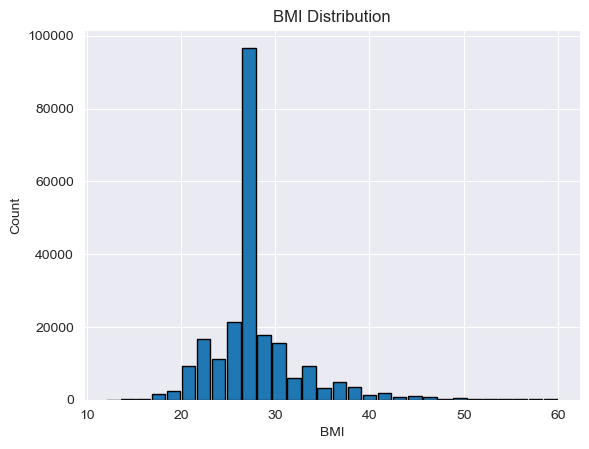

In [9]:
# Histogram(BMI)
'''
Histogram of BMI
Show distribution of BMI values
X-axis: BMI, Y-axis: Count
bins=30 gives finer resolution
rwidth=0.9 adjusts bar width
'''
df["BMI"].hist(bins=30, rwidth=0.9, edgecolor="black")
plt.title("BMI Distribution")
plt.xlabel("BMI"); plt.ylabel("Count")
plt.show()

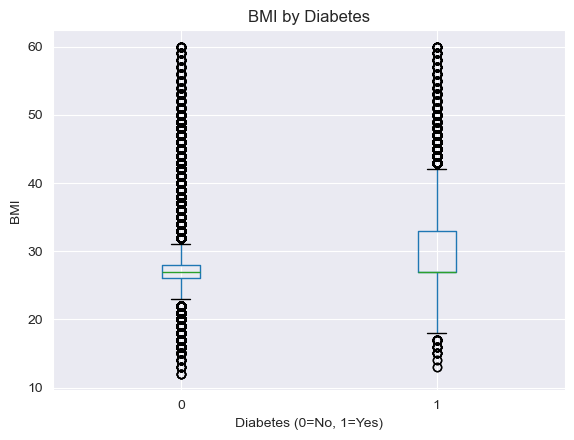

In [10]:

#Boxplot(BMI
'''
Boxplot of BMI grouped by Diabetes
Compare BMI distribution for Diabetes=0 (No) vs Diabetes=1 (Yes)
Y-axis: BMI values
Boxplot shows median, quartiles, and outliers
'''

df.boxplot(column="BMI", by="Diabetes")
plt.title("BMI by Diabetes")
plt.suptitle("")   
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("BMI")
plt.show()

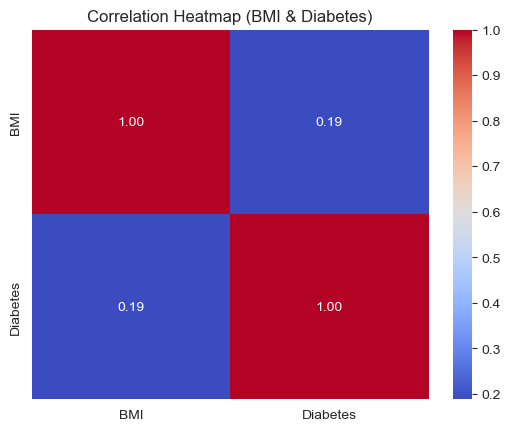

In [11]:

# Correlation heatmap for BMI & Diabetes
'''
Red/blue shows strength of correlation
Numbers are the correlation values
Here it is about 0.19, a weak positive link between BMI and diabetes
'''
corr = df[["BMI","Diabetes"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (BMI & Diabetes)")
plt.show()

## 2.Age (Numerical)

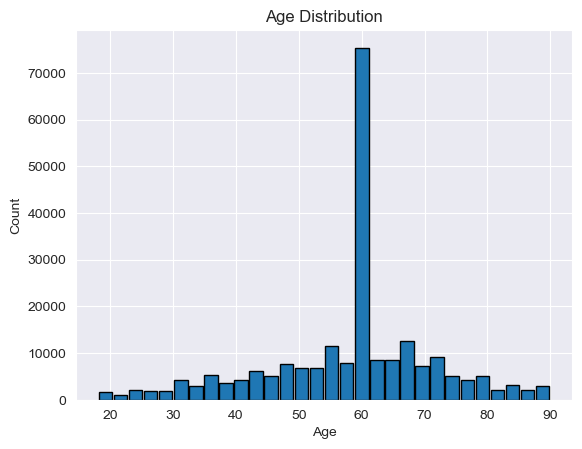

In [12]:
# Histogram (Age)
'''
Histogram of Age
Show distribution of Age values
X-axis: Age, Y-axis: Count
bins=30 gives finer resolution
rwidth=0.9 adjusts bar width
'''

df["Age"].hist(bins=30, rwidth=0.9, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

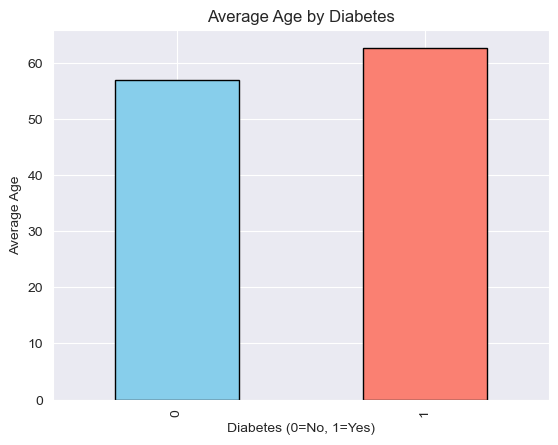

In [13]:
#Bar Plot (Age)
'''
Bar plot of Average Age by Diabetes
X-axis: Diabetes (0=No, 1=Yes)
Y-axis: Average Age
Blue = Non-diabetic group, Red = Diabetic group
Shows that diabetic patients are older on average
'''

mean_age = df.groupby("Diabetes")["Age"].mean()
mean_age.plot(kind="bar", color=["skyblue", "salmon"], edgecolor="black")
plt.title("Average Age by Diabetes")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("Average Age")
plt.show()

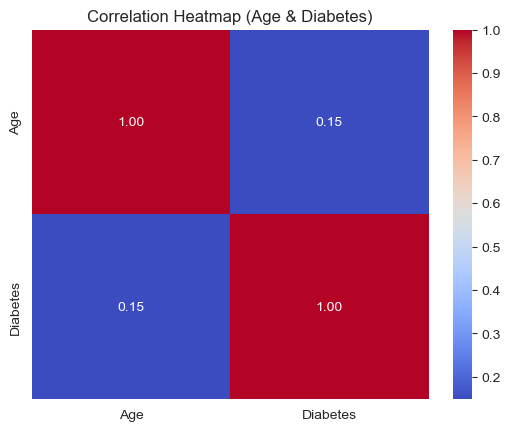

In [14]:
# Correlation heatmap for Age & Diabetes
'''
RRed/blue shows strength of correlation
Numbers are the correlation values
Here it is about 0.15, a weak positive correlation
'''

corr = df[["Age", "Diabetes"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Age & Diabetes)")
plt.show()

## 3.BloodPressure (Categorical)

BloodPressure
0    0.081827
1    0.244657
Name: Diabetes, dtype: Float64


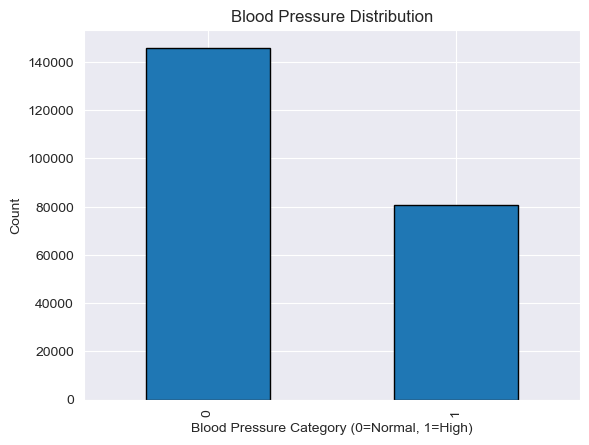

In [15]:
#Calculate the incidence (proportion) of diabetes in different blood pressure groups
print(df.groupby("BloodPressure")["Diabetes"].mean())

#Blood Pressure Distribution
'''
Bar plot of Blood Pressure categories
X-axis: Blood Pressure (0=Normal, 1=High)
Y-axis: Count of individuals
Shows the distribution of blood pressure status in the dataset
'''
df["BloodPressure"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Blood Pressure Distribution")
plt.xlabel("Blood Pressure Category (0=Normal, 1=High)")
plt.ylabel("Count")
plt.show()

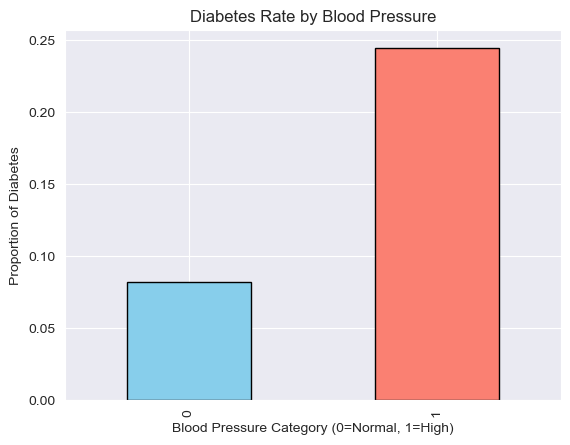

In [16]:
# Diabetes rate by BloodPressure
'''
Bar plot of diabetes rate by blood pressure
X-axis: Blood Pressure (0 = Normal, 1 = High)
Y-axis: Proportion with diabetes
Blue = Normal Blood Pressure group, Red = High Blood Pressure group
Shows diabetes rate is higher in the high Blood Pressure group
'''

diabetes_rate = df.groupby("BloodPressure")["Diabetes"].mean()
diabetes_rate.plot(kind="bar", color=["skyblue", "salmon"], edgecolor="black")

plt.title("Diabetes Rate by Blood Pressure")
plt.xlabel("Blood Pressure Category (0=Normal, 1=High)")
plt.ylabel("Proportion of Diabetes")
plt.show()

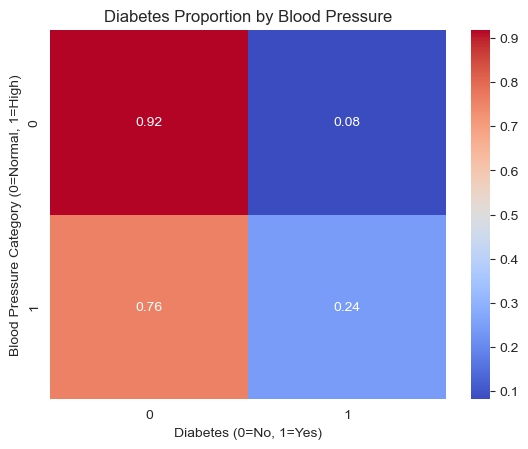

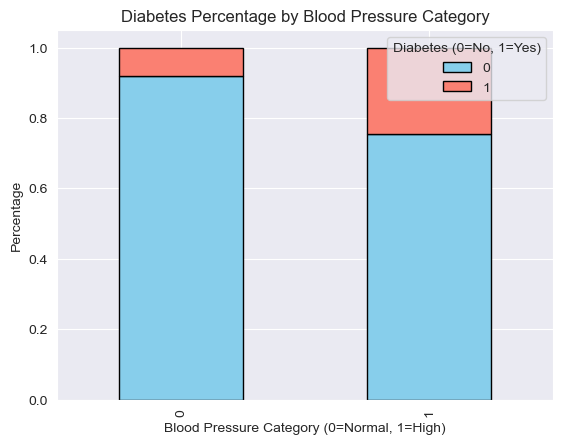

In [17]:
#Diabetes Proportion by Blood Pressure (Heatmap)
'''
Heatmap of diabetes by blood pressure
X-axis: Diabetes (0 = No, 1 = Yes)
Y-axis: Blood Pressure (0 = Normal, 1 = High)
Cells show the proportion of each group
Darker color = higher proportion
'''
bp_ct = pd.crosstab(df["BloodPressure"], df["Diabetes"], normalize="index")

sns.heatmap(bp_ct, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Diabetes Proportion by Blood Pressure")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("Blood Pressure Category (0=Normal, 1=High)")
plt.show()

# Crosstab 
'''
Stacked bar plot of diabetes by blood pressure
X-axis: Blood Pressure (0 = Normal, 1 = High)
Y-axis: Percentage of people
Skyblue = No diabetes (0), Salmon = Diabetes (1)
Shows how many people with and without diabetes are in each blood pressure group
'''

bp_ct.plot(kind="bar", stacked=True, edgecolor="black", 
           color=["skyblue", "salmon"])

plt.title("Diabetes Percentage by Blood Pressure Category")
plt.xlabel("Blood Pressure Category (0=Normal, 1=High)")
plt.ylabel("Percentage")
plt.legend(title="Diabetes (0=No, 1=Yes)")
plt.show()

## 4.Smoking(Categorical)

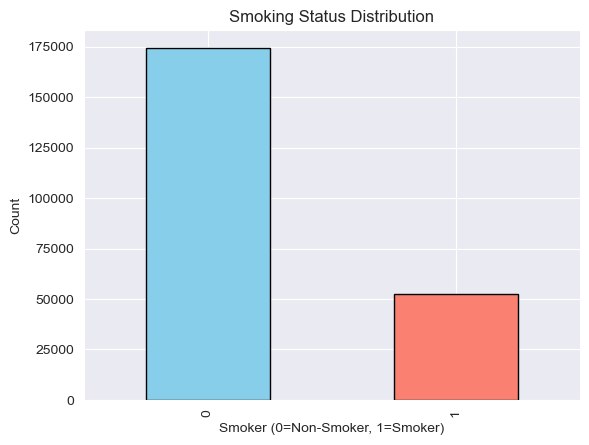

In [18]:
# 1. Distribution of Smoker
'''
Bar plot of Smoking Status distribution
X-axis: Smoker (0 = Non-Smoker, 1 = Smoker)
Y-axis: Count of individuals
Skyblue = Non-Smoker group, Salmon = Smoker group
Shows the number of smokers and non-smokers in the dataset
'''

df["Smoker"].value_counts().plot(
    kind="bar", edgecolor="black", color=["skyblue","salmon"]
)
plt.title("Smoking Status Distribution")
plt.xlabel("Smoker (0=Non-Smoker, 1=Smoker)")
plt.ylabel("Count")
plt.show()

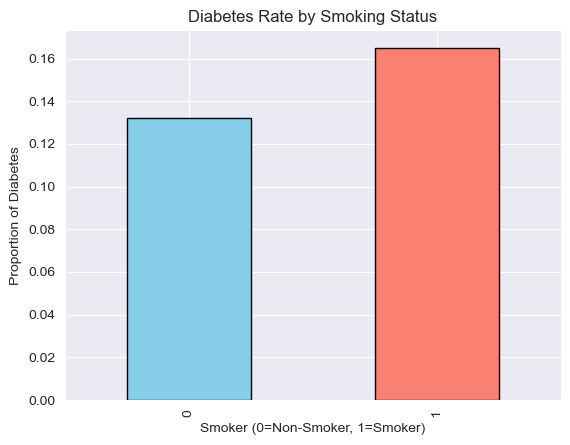

In [19]:
# 2. Diabetes rate by Smoker
'''
Bar plot of diabetes rate by smoking
X-axis: Smoker (0 = No, 1 = Yes)
Y-axis: Proportion with diabetes
Skyblue = Non-smokers, Salmon = Smokers
Shows smokers have more diabetes than non-smokers
'''

smoker_rate = df.groupby("Smoker")["Diabetes"].mean()
smoker_rate.plot(
    kind="bar", color=["skyblue","salmon"], edgecolor="black"
)
plt.title("Diabetes Rate by Smoking Status")
plt.xlabel("Smoker (0=Non-Smoker, 1=Smoker)")
plt.ylabel("Proportion of Diabetes")
plt.show()

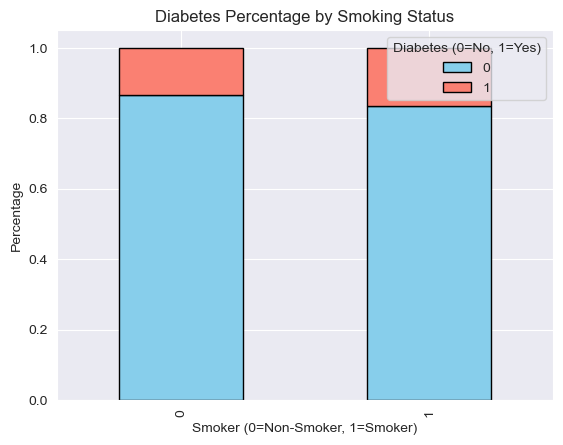

In [20]:
# 3. Crosstab Calculate the proportion of diabetes in whether smoking
'''
Stacked bar plot of diabetes by smoking status
X-axis: Smoker (0 = No, 1 = Yes)
Y-axis: Percentage
Skyblue = No diabetes, Salmon = Diabetes
Shows diabetes rate in smokers vs non-smokers
'''

smoker_ct = pd.crosstab(df["Smoker"], df["Diabetes"], normalize="index")
smoker_ct.plot(
    kind="bar", stacked=True, edgecolor="black", color=["skyblue","salmon"]
)
plt.title("Diabetes Percentage by Smoking Status")
plt.xlabel("Smoker (0=Non-Smoker, 1=Smoker)")
plt.ylabel("Percentage")
plt.legend(title="Diabetes (0=No, 1=Yes)")
plt.show()